# **CAP-417: Estatística Computacional (Computational Statistics)**

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/thedice.jpg" alt="Drawing" width="350"/>

<br>

# ***Kernel Density Estimation***
-----

This notebook was developed by <a href="https://www.statsmodels.org/dev/examples/notebooks/generated/kernel_density.html">statsmodel</a> and
some modifications and additions were developed by Prof. <a href="https://www.linkedin.com/in/valdivino-alexandre-de-santiago-j%C3%BAnior-103109206/?locale=en_US">Valdivino Alexandre de Santiago Júnior</a> for the Computational Statistics CAP course at INPE</a>. However, if you want to cite this material, particularly the parts more related to Kernel Density Estimation, **please cite statsmodels**.


<br>

**Licence**: GNU GENERAL PUBLIC LICENSE, Version 3 (GPLv3)

# Kernel Density Estimation
----

This notebook addresses kernel density estimation (KDE). KDE is one of the most well-known approaches to estimate the underlying probability density function of a dataset. KDE is a non-parametric density estimator requiring no
assumption of whether the underlying density function is from a parametric family. KDE will learn the shape of the density from the data automatically. 

<br>

The concept behind KDE (estimation of the underlying probability density function of a dataset) is in the core of one of the very famous deep learning (DL) technique as of today called generative adversarial newtorks (<a href="https://github.com/vsantjr/DeepLearningMadeEasy/blob/temp_23-09/PyTorch_DCGAN.ipynb">GANs</a>). GANs are a framework for generative models via an adversarial process. GAN's most famous application is deep fake (generation of fake images and/or videos). 

## Kernell
----

A histogram counts the number of data points in somewhat arbitrary regions. On the other hand, a kernel density estimate is a function defined as the sum of a kernel function on every data point. The properties of the kernel function, $K(u)$, are usually: (see <a href="https://www.statsmodels.org/dev/examples/notebooks/generated/kernel_density.html">statsmodels site</a> and <a href="https://medium.com/analytics-vidhya/kernel-density-estimation-kernel-construction-and-bandwidth-optimization-using-maximum-b1dfce127073">N. Pramanik's post</a> for details) :

* It must be symmetrical. Hence, $K(u) = K(-u)$;
* The area under the curve of the function must be equal to one. In other words, it has the property of normalisation: $\int_{-\infty}^{\infty} K(u) \,du = 1 $ ;
*  Monotonically decreasing such that $K'(u) < 0$ when $u > 0$;
*  Expected value (mean) equals to zero: $E[K] = 0$ .

<br>

To sum up, kernel functions are used to estimate density of random variables and as weighing function in non-parametric regression. This function is also used in machine learning (ML) as kernel method to perform classification and clustering.

<br>

In statsmodel, a univariate kernel density estimator is implemented in ```sm.nonparametric.KDEUnivariate```. 

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
np.random.seed(12345)  # Seed the random number generator for reproducible results

A bimodal distribution is created: a mixture of two normal distributions with locations at -1 and 1.

In [3]:
# Location, scale and weight for the two distributions
dist1_loc, dist1_scale, weight1 = -1, 0.5, 0.25
dist2_loc, dist2_scale, weight2 = 1, 0.5, 0.75

# Sample from a mixture of distributions
obs_dist = mixture_rvs(
    prob=[weight1, weight2],
    size=250,
    dist=[stats.norm, stats.norm],
    kwargs=(
        dict(loc=dist1_loc, scale=dist1_scale),
        dict(loc=dist2_loc, scale=dist2_scale),
    ),
)

# Show obs_dist
print('Observations: ', obs_dist)

Observations:  [ 1.40211135  0.92163225 -0.84531892 -1.28869274  2.00519501  0.55644778
  0.51103188  0.86639133  1.24166891  0.79983363  1.22494021  1.19979698
 -1.58431704 -1.41250999  0.9242126  -0.27896703  1.08040342  1.03826253
  0.85139792  0.35286299  0.55740999  0.90625174  0.75322     0.94229352
  0.8246277   1.02234869  0.55112184  1.44543675  0.42440742 -2.32220475
 -1.0764929  -0.30615135  1.5706251  -1.3759605   0.56643224  1.19179163
  0.78148492 -1.06630463  1.17374441  0.38491048  1.28553907  1.03003061
  0.887238   -0.27135015 -0.69524408  1.67486307  1.67514987  0.80667334
  1.43299477 -1.24688963  1.8736168  -0.38001006  0.29487693  0.81087924
  0.82708967 -1.06786107  1.19003123  1.09449734  1.6616491  -0.1322943
  0.54251069  0.76051792  1.52359225 -0.2849791  -1.42342623  1.46197421
  0.94292493  1.20290122  1.1442259   0.78260575  1.17937782  0.80587753
  2.06437315  1.70480234  0.94728286 -0.69835893 -0.36821387  1.35021418
  2.04642594  0.9315141   0.53475529 

The simplest non-parametric technique for density estimation is the histogram.

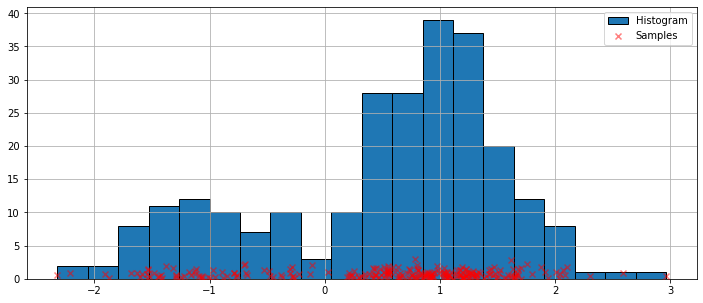

In [4]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

# Scatter plot of data samples and histogram
ax.scatter(
    obs_dist,
    np.abs(np.random.randn(obs_dist.size)),
    zorder=15,
    color="red",
    marker="x",
    alpha=0.5,
    label="Samples",
)
lines = ax.hist(obs_dist, bins=20, edgecolor="k", label="Histogram")

ax.legend(loc="best")
ax.grid(True, zorder=-5)

## Fitting with the default arguments
----

In order to compute a continuous probability density function, we can use a kernel density estimation.

We initialise a univariate kernel density estimator using KDEUnivariate.

In [5]:
kde = sm.nonparametric.KDEUnivariate(obs_dist)
kde.fit()  # Estimate the densities

Below, we present a figure of the fit, as well as the true distribution.

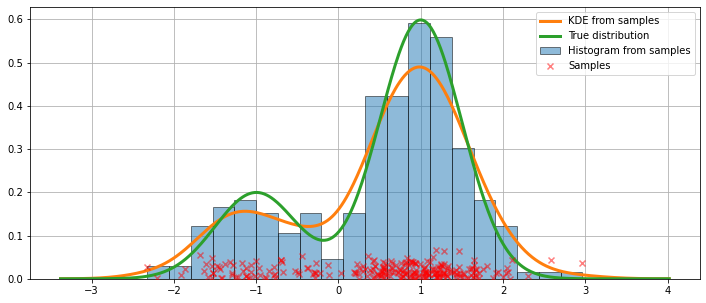

In [6]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

# Plot the histrogram
ax.hist(
    obs_dist,
    bins=20,
    density=True,
    label="Histogram from samples",
    zorder=5,
    edgecolor="k",
    alpha=0.5,
)

# Plot the KDE as fitted using the default arguments
ax.plot(kde.support, kde.density, lw=3, label="KDE from samples", zorder=10)

# Plot the true distribution
true_values = (
    stats.norm.pdf(loc=dist1_loc, scale=dist1_scale, x=kde.support) * weight1
    + stats.norm.pdf(loc=dist2_loc, scale=dist2_scale, x=kde.support) * weight2
)
ax.plot(kde.support, true_values, lw=3, label="True distribution", zorder=15)

# Plot the samples
ax.scatter(
    obs_dist,
    np.abs(np.random.randn(obs_dist.size)) / 40,
    marker="x",
    color="red",
    zorder=20,
    label="Samples",
    alpha=0.5,
)

ax.legend(loc="best")
ax.grid(True, zorder=-5)

## Bandwidth selection/optimisation
----

The KDE algorithm takes a parameter, bandwidth, that affects how "smooth" the resulting curve is. Bandwidth selection/optimisation is very important. Note that, as <a href="https://medium.com/analytics-vidhya/kernel-density-estimation-kernel-construction-and-bandwidth-optimization-using-maximum-b1dfce127073">N. Pramanik's post</a> mentions, a "low value of bandwidth estimates density with lot of variance whereas high value of the bandwidth produces large bias" (Note: variance and bias are two relevant concepts related to ML/DL systems). 

<br>

Note that there are several methods for bandwidth selection/optimisation such as the <a href="https://ned.ipac.caltech.edu/level5/March02/Silverman/paper.pdf">rule of thumb</a>, <a href="https://link.springer.com/article/10.1007/s001800000033">least square cross-validation</a>, and <a href="https://www.jstor.org/stable/2289391"> biased cross-validation</a>.

<br>

In the previous code, default arguments were used. Here, we will vary the bandwidth of the kernel. The bandwidth of the kernel can be adjusted using the ```bw``` argument. In the following example, a bandwidth of ```bw = 0.2``` seems to fit the data well.

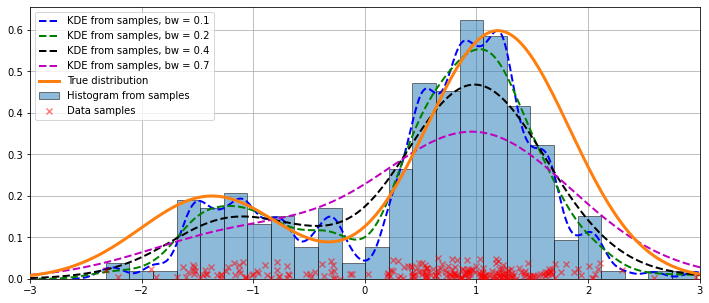

In [7]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

# Plot the histrogram
ax.hist(
    obs_dist,
    bins=25,
    label="Histogram from samples",
    zorder=5,
    edgecolor="k",
    density=True,
    alpha=0.5,
)

# Plot the KDE for various bandwidths
my_colors = ['b', 'g', 'k', 'm']
bandwidth = [0.1, 0.2, 0.4, 0.7]
#for bandwidth in [0.1, 0.2, 0.4]:
for i in range(len(bandwidth)):
    kde.fit(bw=bandwidth[i])  # Estimate the densities
    ax.plot(
        kde.support,
        kde.density,
        "--",
        lw=2,
        color=my_colors[i],
        zorder=10,
        label="KDE from samples, bw = {}".format(round(bandwidth[i], 2)),
    )

# Plot the true distribution
ax.plot(kde.support, true_values, lw=3, label="True distribution", zorder=15)

# Plot the samples
ax.scatter(
    obs_dist,
    np.abs(np.random.randn(obs_dist.size)) / 50,
    marker="x",
    color="red",
    zorder=20,
    label="Data samples",
    alpha=0.5,
)

ax.legend(loc="best")
ax.set_xlim([-3, 3])
ax.grid(True, zorder=-5)

## Choosing the Kernell
----

A Gaussian kernel was used in the previous example. Statsmodels provide other kernels.

In [8]:
from statsmodels.nonparametric.kde import kernel_switch

list(kernel_switch.keys())

['gau', 'epa', 'uni', 'tri', 'biw', 'triw', 'cos', 'cos2']

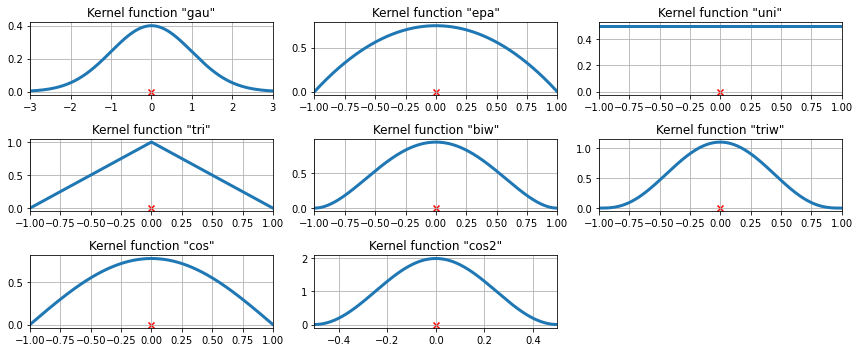

In [9]:
# Create a figure
fig = plt.figure(figsize=(12, 5))

# Enumerate every option for the kernel
for i, (ker_name, ker_class) in enumerate(kernel_switch.items()):

    # Initialise the kernel object
    kernel = ker_class()

    # Sample from the domain
    domain = kernel.domain or [-3, 3]
    x_vals = np.linspace(*domain, num=2 ** 10)
    y_vals = kernel(x_vals)

    # Create a subplot, set the title
    ax = fig.add_subplot(3, 3, i + 1)
    ax.set_title('Kernel function "{}"'.format(ker_name))
    ax.plot(x_vals, y_vals, lw=3, label="{}".format(ker_name))
    ax.scatter([0], [0], marker="x", color="red")
    plt.grid(True, zorder=-5)
    ax.set_xlim(domain)

plt.tight_layout()

Let us take a look on how the kernel density estimate will fit to three equally spaced data points.

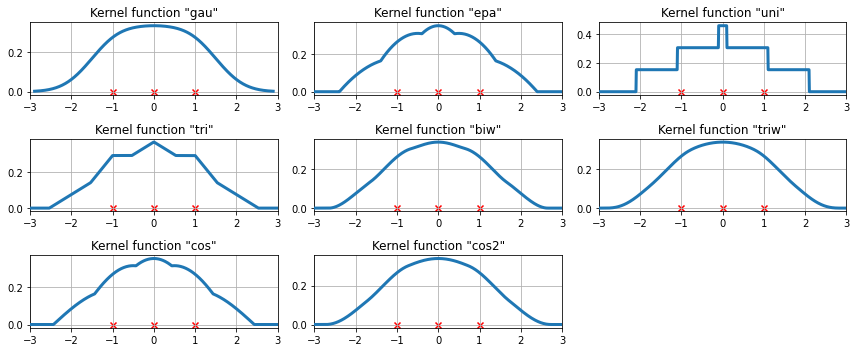

In [10]:
# Create three equidistant points
data = np.linspace(-1, 1, 3)
kde = sm.nonparametric.KDEUnivariate(data)

# Create a figure
fig = plt.figure(figsize=(12, 5))

# Enumerate every option for the kernel
for i, kernel in enumerate(kernel_switch.keys()):

    # Create a subplot, set the title
    ax = fig.add_subplot(3, 3, i + 1)
    ax.set_title('Kernel function "{}"'.format(kernel))

    # Fit the model (estimate densities)
    kde.fit(kernel=kernel, fft=False, gridsize=2 ** 10)

    # Create the plot
    ax.plot(kde.support, kde.density, lw=3, label="KDE from samples", zorder=10)
    ax.scatter(data, np.zeros_like(data), marker="x", color="red")
    plt.grid(True, zorder=-5)
    ax.set_xlim([-3, 3])

plt.tight_layout()

## Exercise 4 (Practical)
----

Consider the small image dataset presented <a href="https://github.com/vsantjr/CAP/tree/master/CAP417/Images">here</a>. In order to solve this exercise, you need to:
 
* Read/open the images. There are several ways to do it (in Python, in other programming languages);
* Select image features. Image features are important to represent each image. Select at least two of these features.

<br>

Develop a program in order to:

1.  Present the components based on this dataset. Use Gaussian Mixture Models (GMMs) to solve this item;
2.  Estimate the probability density function for each component you have found in the previous item. Show the plots. What is the best bandwidth in this case?
3.  Estimate the probability density function for the entire dataset. Show the plot. What is the best bandwidth in this case?


<br>

**Deadline**: 12 may 2022

<br>

**IMPORTANT**: The last date to finish and send all the exercises is **12 may 2022**.